In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix
from skopt import BayesSearchCV

[0.9534883720930233, 0.9601328903654485, 0.9601328903654485, 0.9634551495016611, 0.9601328903654485, 0.9568106312292359, 0.9501661129568106, 0.9534883720930233, 0.9568106312292359, 0.9534883720930233, 0.9634551495016611, 0.9667774086378738, 0.9667774086378738, 0.9667774086378738, 0.9700996677740864, 0.9700996677740864, 0.9700996677740864, 0.9700996677740864, 0.973421926910299, 0.9700996677740864, 0.9700996677740864, 0.9667774086378738, 0.9601328903654485, 0.9601328903654485, 0.9601328903654485]


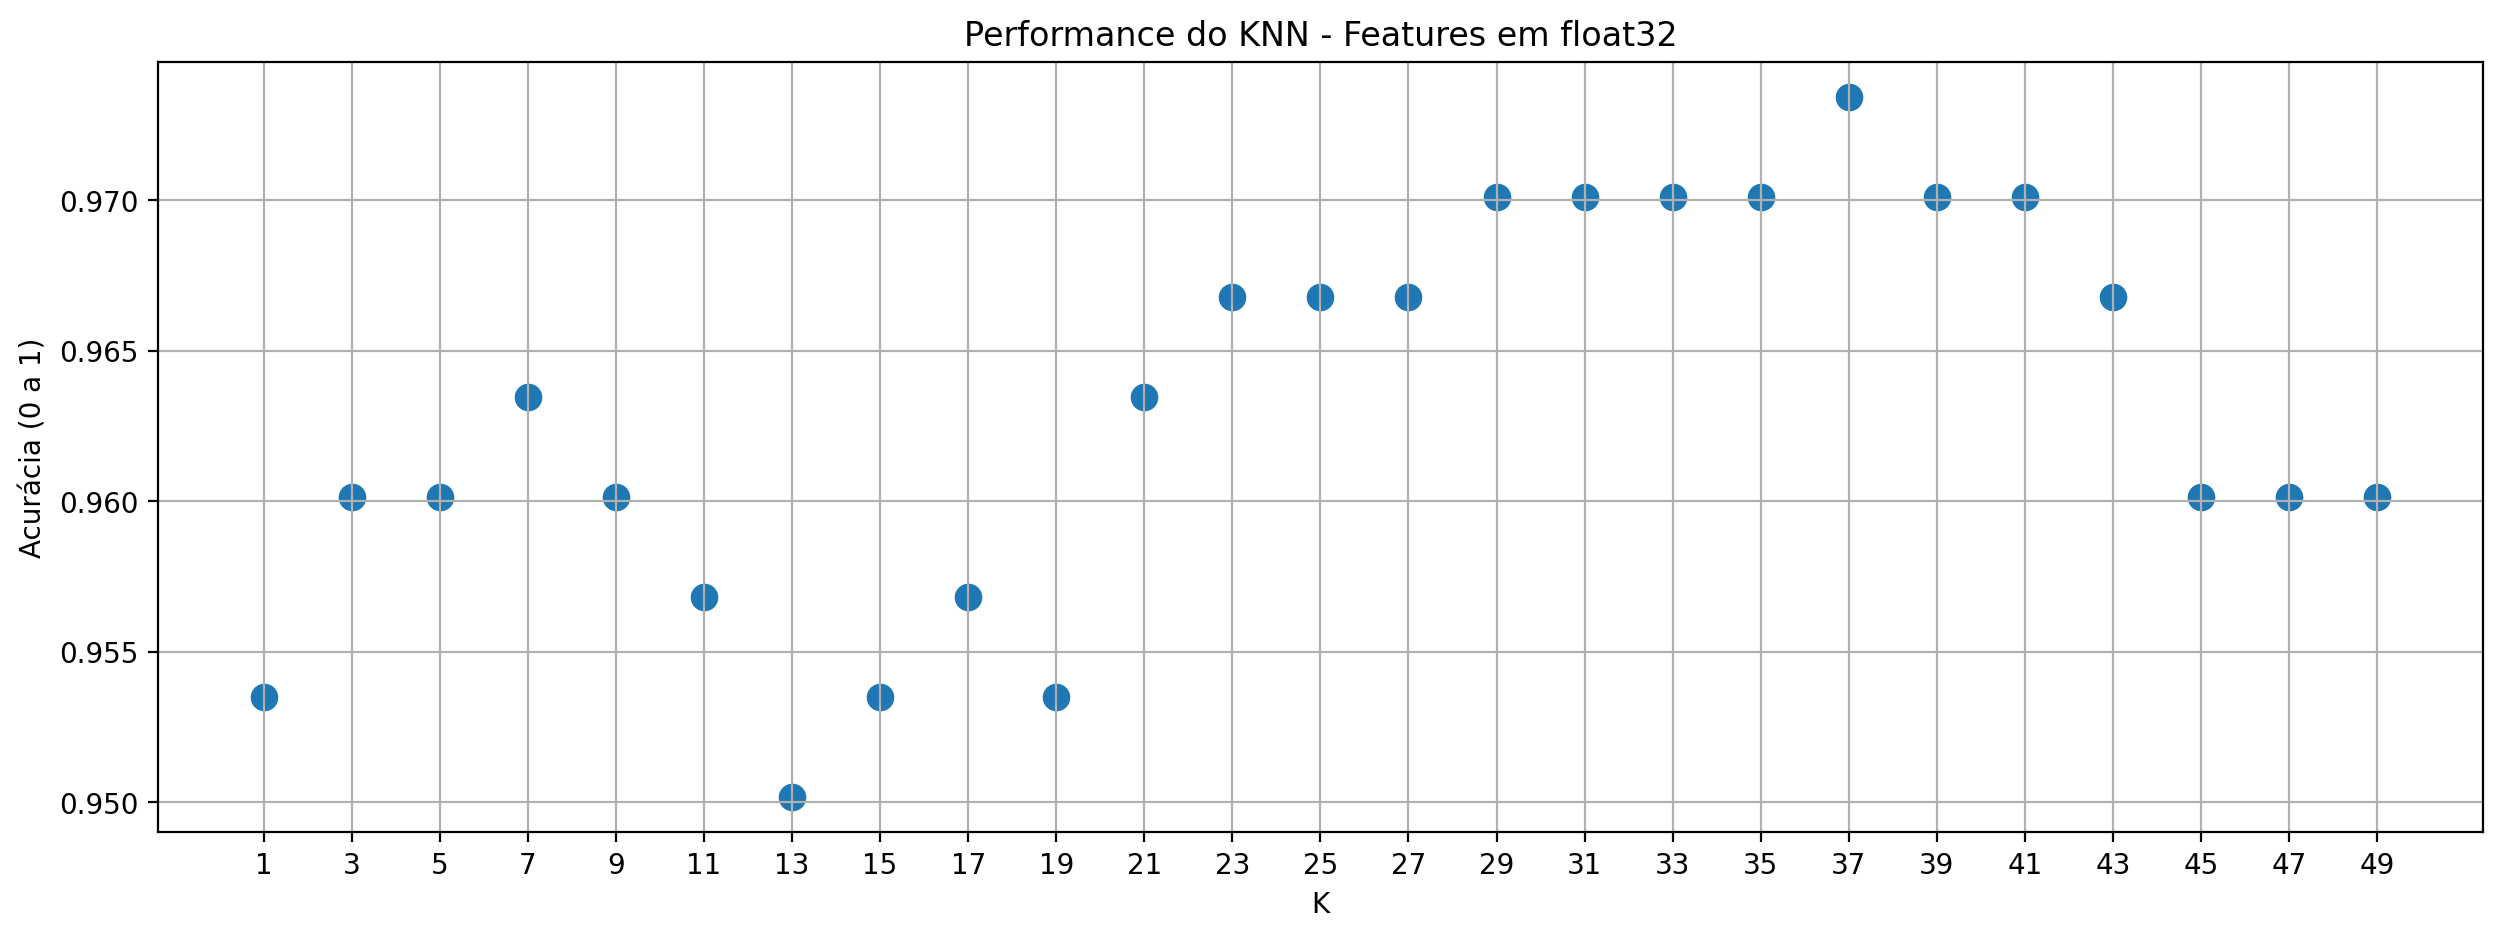

In [24]:
exclude_labels = [0] # colocar aqui as labels que quiser descartar
train = pd.read_parquet('./data/TRAIN_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
train = train[~train['label'].isin(exclude_labels)]
train_matrices = train.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float32)
train_matrices /= abs(np.expand_dims(train_matrices.mean(axis=(1,2)), axis=[1, 2]))

test = pd.read_parquet('./data/TEST_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
test = test[~test['label'].isin(exclude_labels)]
test_matrices = test.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float32)
test_matrices /= abs(np.expand_dims(test_matrices.mean(axis=(1, 2)), axis=[1, 2]))

train_carrier_means = train_matrices.mean(axis=2)
train_carrier_stds = train_matrices.std(axis=2)

test_carrier_means = test_matrices.mean(axis=2)
test_carrier_stds = test_matrices.std(axis=2)

train_features = np.concatenate([train_carrier_means, train_carrier_stds], axis=1)
test_features = np.concatenate([test_carrier_means, test_carrier_stds], axis=1)

scores_32 = []
ks = range(1, 50, 2)

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_features, train['label'])
    preds = model.predict(test_features)
    score = accuracy_score(test['label'], preds)
    scores_32.append(score)

fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=200)
print(scores_32)
ax.scatter(ks, scores_32, s=80)
plt.xticks(ks)
plt.xlabel('K')
plt.ylabel('Acurácia (0 a 1)')
plt.title('Performance do KNN - Features em float32')
plt.grid()
plt.show()



[0.9568106312292359, 0.9534883720930233, 0.9501661129568106, 0.9534883720930233, 0.9568106312292359, 0.9601328903654485, 0.9568106312292359, 0.9568106312292359, 0.9568106312292359, 0.9601328903654485, 0.9667774086378738, 0.9700996677740864, 0.9667774086378738, 0.9667774086378738, 0.9634551495016611, 0.9667774086378738, 0.9634551495016611, 0.9634551495016611, 0.9634551495016611, 0.9601328903654485, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9435215946843853]


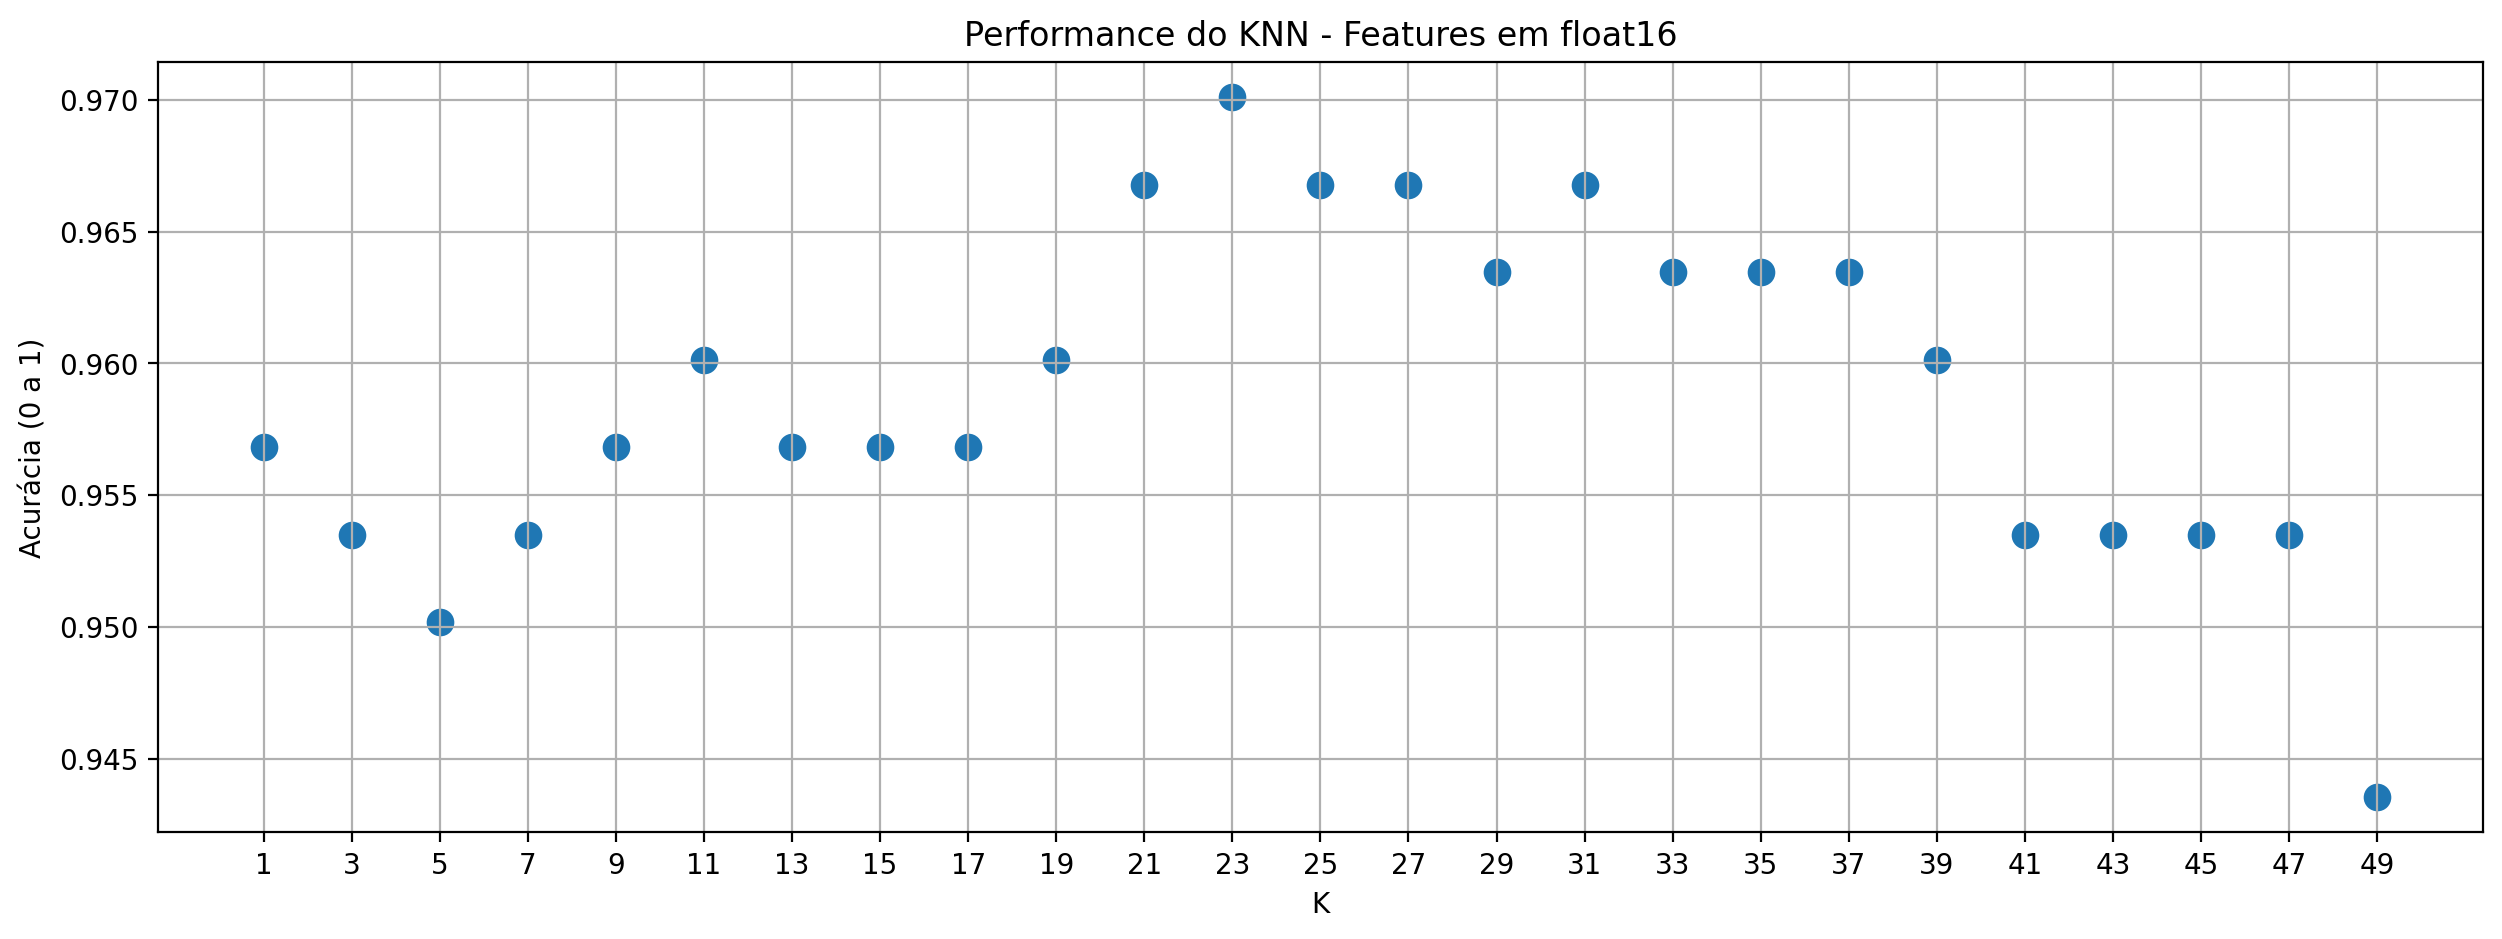

In [21]:
exclude_labels = [0] # colocar aqui as labels que quiser descartar
train = pd.read_parquet('./data/TRAIN_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
train = train[~train['label'].isin(exclude_labels)]
train_matrices = train.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float16)
train_matrices /= abs(np.expand_dims(train_matrices.mean(axis=(1,2)), axis=[1, 2]))

test = pd.read_parquet('./data/TEST_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
test = test[~test['label'].isin(exclude_labels)]
test_matrices = test.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float16)
test_matrices /= abs(np.expand_dims(test_matrices.mean(axis=(1, 2)), axis=[1, 2]))

train_carrier_means = train_matrices.mean(axis=2)
train_carrier_stds = train_matrices.std(axis=2)

test_carrier_means = test_matrices.mean(axis=2)
test_carrier_stds = test_matrices.std(axis=2)

train_features = np.concatenate([train_carrier_means, train_carrier_stds], axis=1)
test_features = np.concatenate([test_carrier_means, test_carrier_stds], axis=1)

scores_16 = []
ks = range(1, 50, 2)

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_features, train['label'])
    preds = model.predict(test_features)
    score = accuracy_score(test['label'], preds)
    scores_16.append(score)

fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=200)
print(scores_16)
ax.scatter(ks, scores_16, s=80)
plt.xticks(ks)
plt.xlabel('K')
plt.ylabel('Acurácia (0 a 1)')
plt.title('Performance do KNN - Features em float16')
plt.grid()
plt.show()



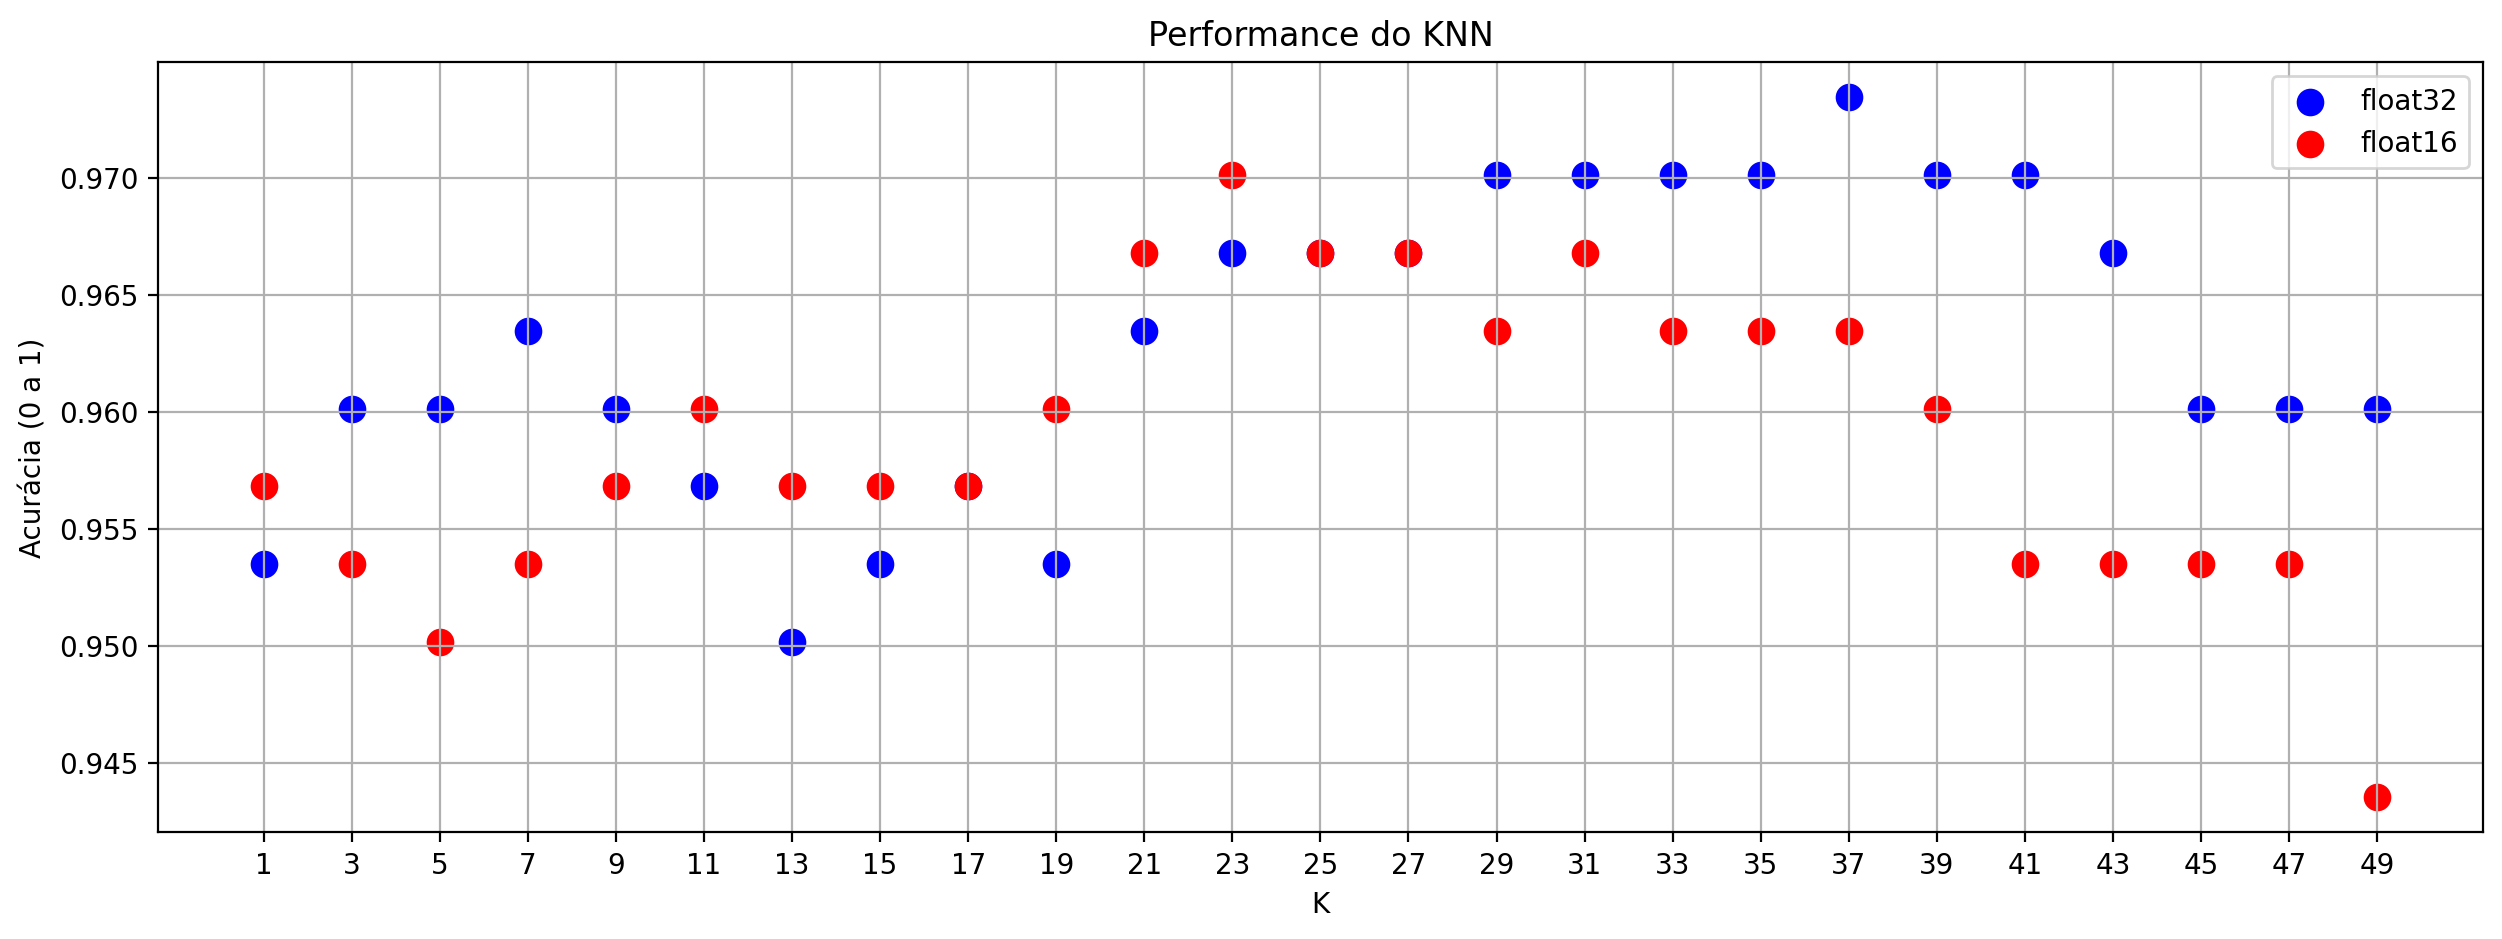

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=200)

ax.scatter(ks, scores_32, s=80, label='float32', color='blue')
ax.scatter(ks, scores_16, s=80, label='float16', color='red')

plt.xticks(ks)
plt.xlabel('K')
plt.ylabel('Acurácia (0 a 1)')
plt.title('Performance do KNN')
plt.grid()
plt.legend()
plt.show()



In [14]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(train_features, train['label'])
preds = model.predict(test_features)
score = accuracy_score(test['label'], preds)
score

0.9302325581395349

In [15]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_features, train['label'])
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.8471760797342193


In [41]:
model = LogisticRegression()
model.fit(train_features, train['label'])
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.840531561461794


/home/paulo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
model = SVC(kernel='linear', C=4, )
model.fit(train_features, train['label'])
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.8970099667774086


In [43]:
model.coef_.shape

(6, 104)